In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
df = pd.read_csv("dataset.csv")

# Data Preprocessing

### Handle Missing Values

In [93]:
df = df.drop(columns=['id'])
df.duplicated().any()

False

In [94]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [95]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
df["smoking_status"] = df["smoking_status"].fillna("unknown")

### One Hot Encoding

In [96]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [97]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

encoded_parts = []

for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummies = dummies.iloc[:, :-1]  # Drop the last category
    encoded_parts.append(dummies)

df = df.drop(columns=categorical_cols)
df = pd.concat([df] + encoded_parts, axis=1)
df.head(4)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,False,True,True,False,False,False,False,True,False,False,False
1,58.0,1,0,87.96,39.2,0,False,True,False,False,False,True,False,False,False,True,False
2,8.0,0,0,110.89,17.6,0,True,False,True,False,False,True,False,False,False,False,False
3,70.0,0,0,69.04,35.9,0,True,False,False,False,False,True,False,True,True,False,False


In [98]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
Residence_type_Rural              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

# Summary Statistics

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             43400 non-null  float64
 1   hypertension                    43400 non-null  int64  
 2   heart_disease                   43400 non-null  int64  
 3   avg_glucose_level               43400 non-null  float64
 4   bmi                             43400 non-null  float64
 5   stroke                          43400 non-null  int64  
 6   gender_Female                   43400 non-null  bool   
 7   gender_Male                     43400 non-null  bool   
 8   ever_married_No                 43400 non-null  bool   
 9   work_type_Govt_job              43400 non-null  bool   
 10  work_type_Never_worked          43400 non-null  bool   
 11  work_type_Private               43400 non-null  bool   
 12  work_type_Self-employed         

In [100]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.574551,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.639769,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


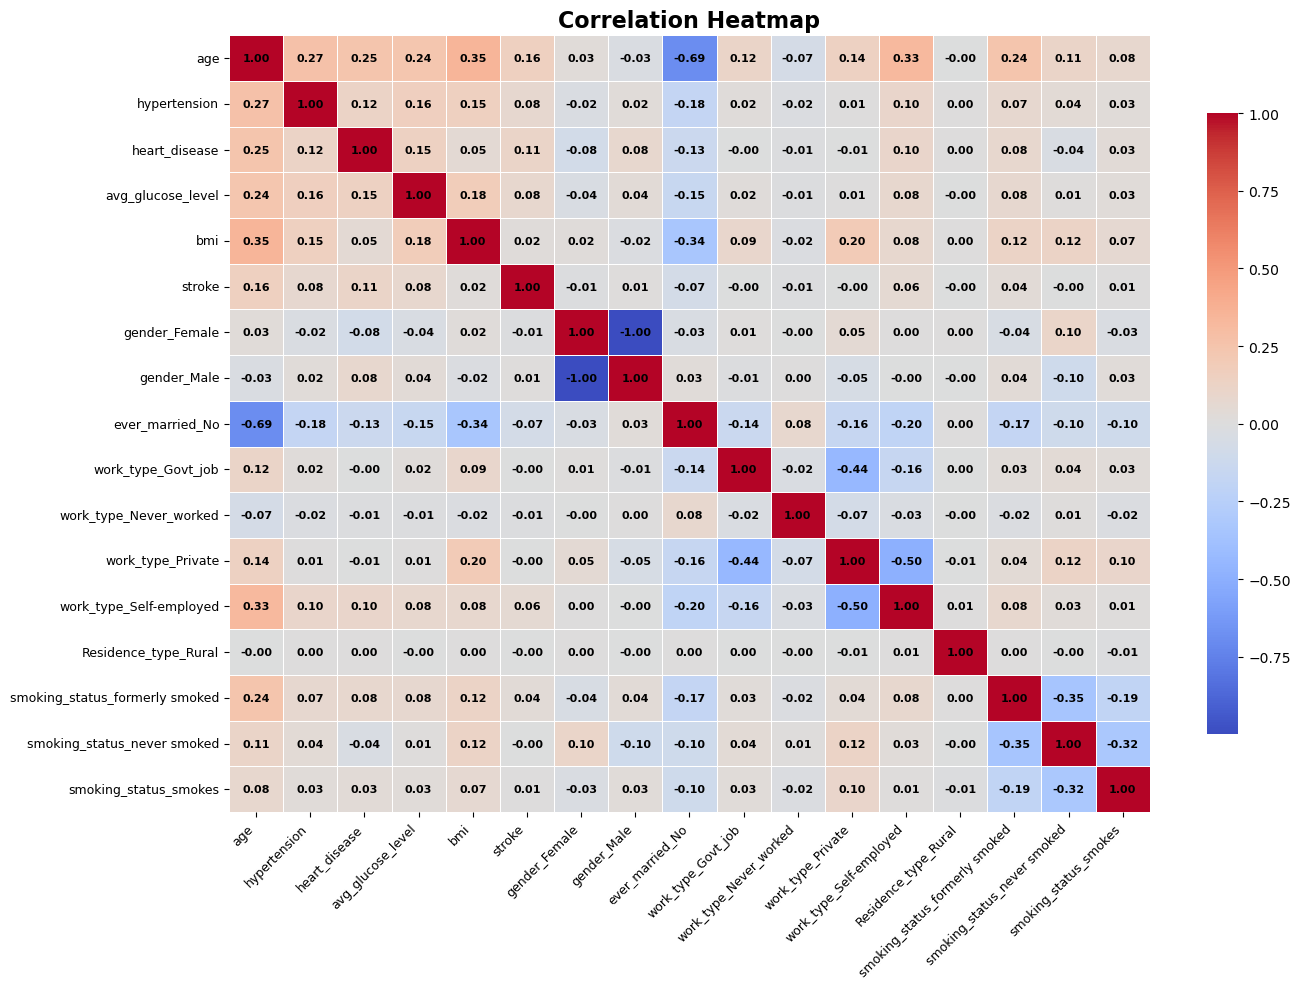

In [101]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='white',
            annot_kws={'size': 8, 'weight': 'bold', 'color': 'black'})

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Basic Data Visualization

### Countplot of Stroke

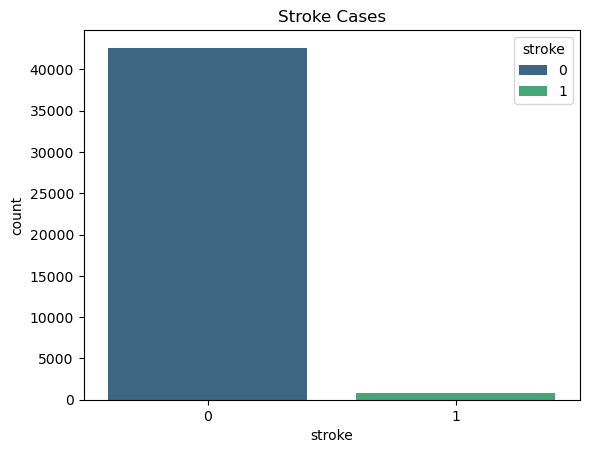

In [102]:
sns.countplot(x='stroke', data=df, hue='stroke', palette='viridis')
plt.title("Stroke Cases")
plt.show()

### Histogram of Average Glucose Level

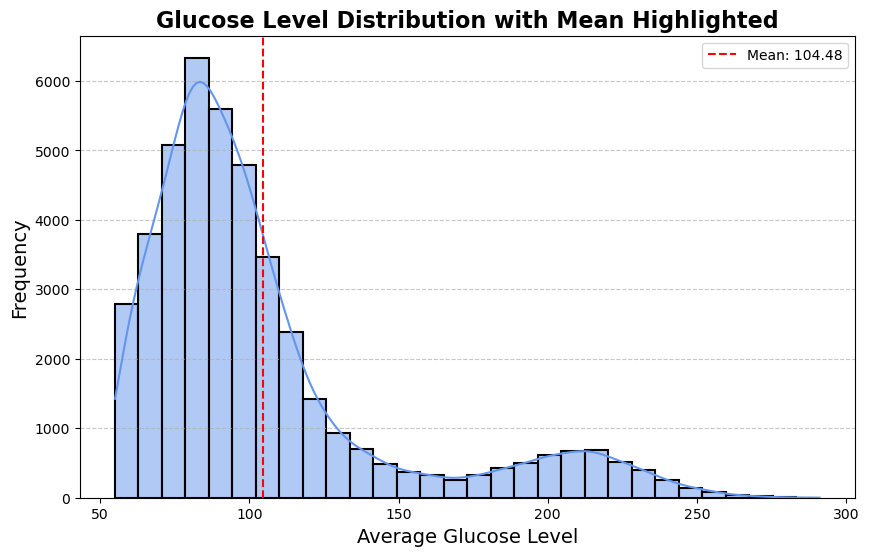

In [103]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_glucose_level'], kde=True, color='cornflowerblue', bins=30, linewidth=1.5)

mean_glucose = df['avg_glucose_level'].mean()

plt.axvline(mean_glucose, color='red', linestyle='--', label=f'Mean: {mean_glucose:.2f}')
plt.title("Glucose Level Distribution with Mean Highlighted", fontsize=16, fontweight='bold')
plt.xlabel("Average Glucose Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Box and Whisker Plot of BMI vs Stroke

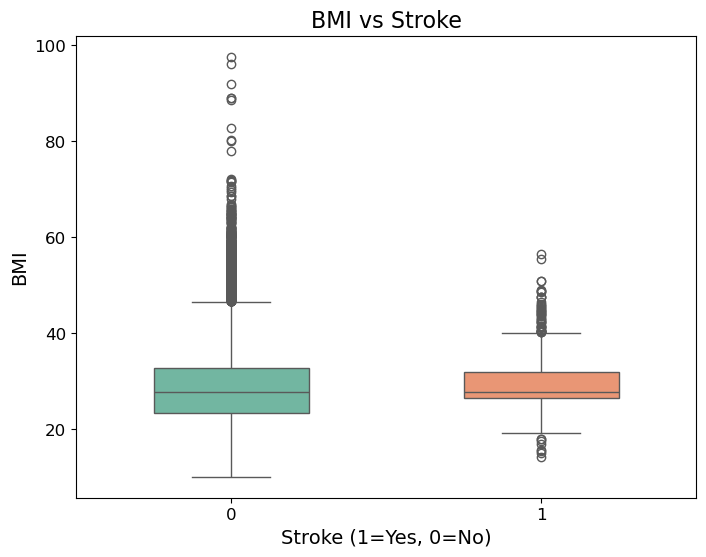

In [104]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='stroke', y='bmi', hue='stroke', palette='Set2', width=0.5, legend=False)

plt.title("BMI vs Stroke", fontsize=16)
plt.xlabel("Stroke (1=Yes, 0=No)", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Kernel Density Estimate of Age by Stroke Status

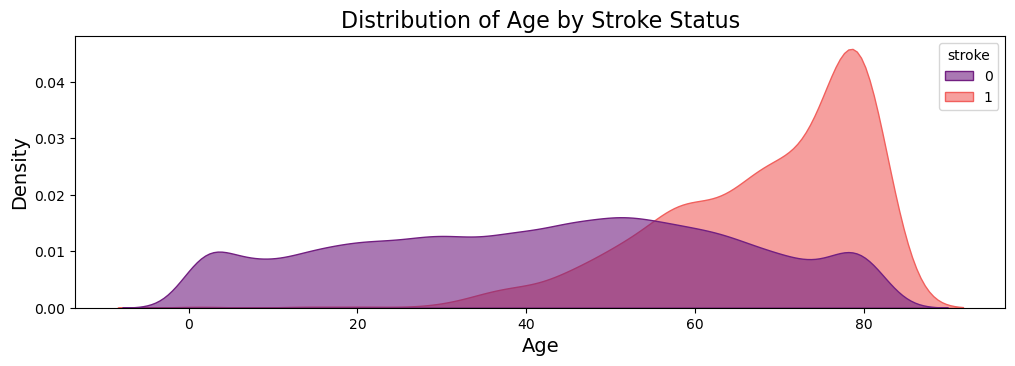

In [105]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='magma')
plt.title("Distribution of Age by Stroke Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate of BMI by Stroke Status

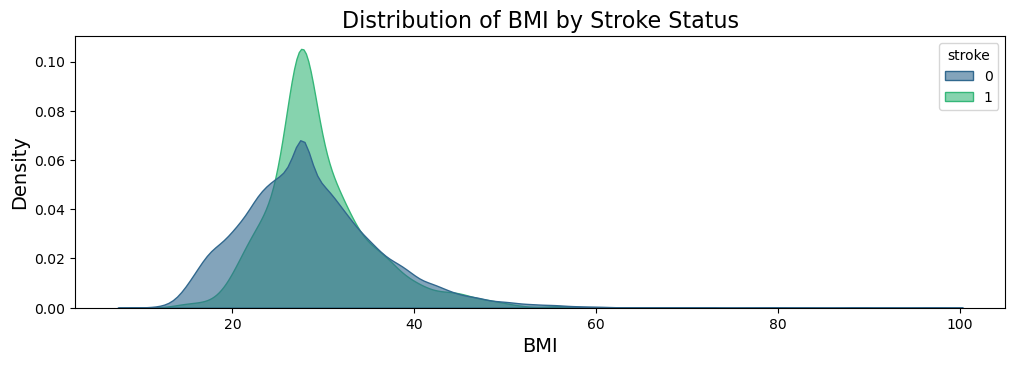

In [106]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='viridis')
plt.title("Distribution of BMI by Stroke Status", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate of Average Glucose Level by Stroke Status

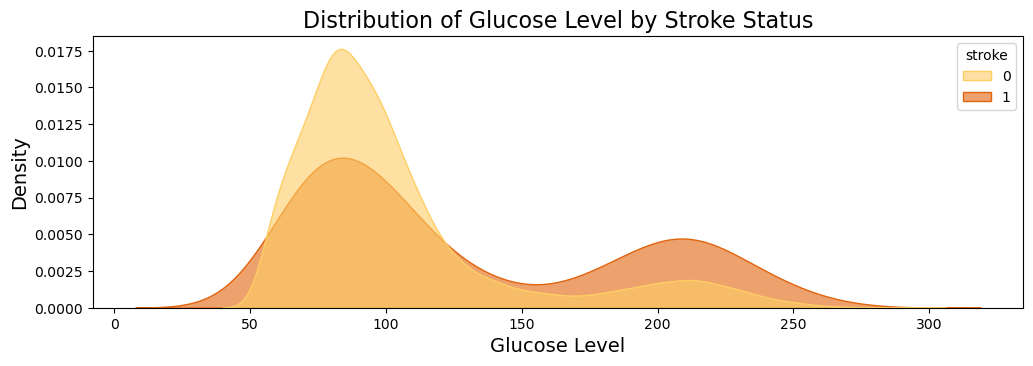

In [107]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='YlOrBr')
plt.title("Distribution of Glucose Level by Stroke Status", fontsize=16)
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Countplot of Hypertension and Stroke

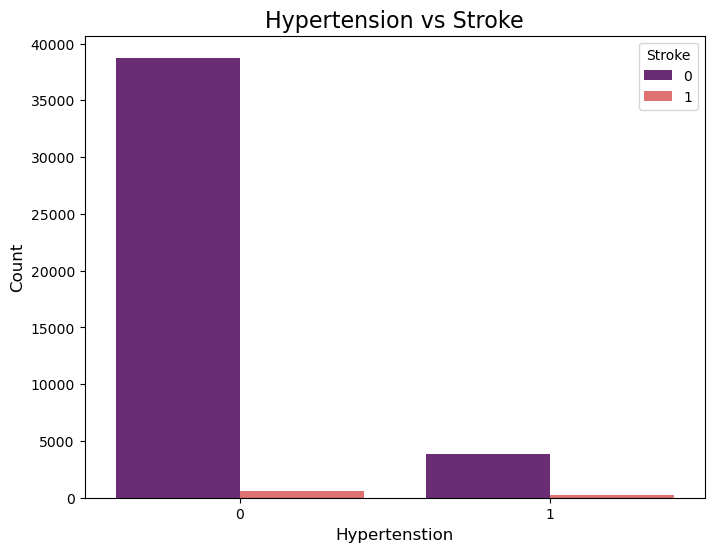

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='magma')

plt.title('Hypertension vs Stroke', fontsize=16)
plt.xlabel('Hypertenstion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Stroke', loc='upper right')
plt.show()

In [109]:
df.to_csv("cleaned.csv", index=False)

# Model Building and Training

In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, auc, roc_auc_score, roc_curve, precision_score, recall_score 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### Oversampling

Random Oversampling is used which duplicates fields from the minority class (Stroke positive) to balance the dataset

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

KeyError: "['gender', 'ever_married'] not in index"

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

### Scaling

Numerical Columns are scaled

In [113]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Models Training

Hyperparameter tuning is done to determine which settings provides the best result in a model

In [114]:
# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1.0, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}


# Base models
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(random_state=1),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

GridSearchCV used for for cross validation and ensuring all of the split dataset is trained and tested fairly through folds (10 is used) while also training the models to determine the best hyperparameters

In [115]:
trained_models = {}
roc_data = {}
pr_data = {}
metrics_summary = {}

for name, base_model in base_models.items():
    print(f"\n=== {name} ===")  
    
    grid = GridSearchCV(base_model, param_grids[name], cv=10, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    best_cv_score = grid.best_score_

    print("Best Parameters:", grid.best_params_)
    print(f"Best Cross-Validation F1 Score: {best_cv_score:.4f}")

    trained_models[name] = model
    
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred = (y_scores >= 0.5).astype(int)

    # Classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # AUC Score
    auc_score = roc_auc_score(y_test, y_scores)
    print(f"AUC Score: {auc_score:.4f}")

    # Store ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    # Store PR Curve
    pr_precision, pr_recall, _ = precision_recall_curve(y_test, y_scores)
    pr_data[name] = (pr_recall, pr_precision)

    # Store Metrics
    precision_val = precision_score(y_test, y_pred, zero_division=0)
    recall_val = recall_score(y_test, y_pred, zero_division=0)
    f1_val = f1_score(y_test, y_pred, zero_division=0)
    accuracy_val = accuracy_score(y_test, y_pred)

    metrics_summary[name] = {
        'Accuracy': accuracy_val,
        'Precision': precision_val,
        'Recall': recall_val,
        'F1 Score': f1_val,
        'AUC': auc_score
    }


=== Logistic Regression ===
Best Parameters: {'C': 0.1}
Best Cross-Validation F1 Score: 0.7864
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      8523
           1       0.69      0.67      0.68      4262

    accuracy                           0.79     12785
   macro avg       0.76      0.76      0.76     12785
weighted avg       0.79      0.79      0.79     12785

Confusion Matrix:
[[7218 1305]
 [1410 2852]]
AUC Score: 0.8548

=== Random Forest ===
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation F1 Score: 0.9907
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8523
           1       0.98      1.00      0.99      4262

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0

#### Summary: Best Hyperparameters for Each Model



##### **Logistic Regression**
- `C`: **0.1**



##### **Random Forest**
- `max_depth`: **15**  
- `min_samples_leaf`: **1**  
- `min_samples_split`: **10**  
- `n_estimators`: **200**



##### **XGBoost**
- `learning_rate`: **0.1**  
- `max_depth`: **6**  
- `n_estimators`: **200**



##### **K-Nearest Neighbors**
- `n_neighbors`: **3**



##### **Gradient Boosting**
- `learning_rate`: **0.1**  
- `max_depth`: **5**  
- `n_estimators`: **200**



##### **Decision Tree**
- `max_depth`: **20**  
- `min_samples_leaf`: **1**  
- `min_samples_split`: **2**


### Observing Important Features

                           Feature  Importance
0                              age    0.380290
3                avg_glucose_level    0.198116
4                              bmi    0.177917
2                    heart_disease    0.045237
7                  ever_married_No    0.034590
1                     hypertension    0.029765
12            Residence_type_Rural    0.022885
11         work_type_Self-employed    0.018571
14     smoking_status_never smoked    0.017609
15           smoking_status_smokes    0.014851
13  smoking_status_formerly smoked    0.014642
10               work_type_Private    0.012644
5                    gender_Female    0.011700
6                      gender_Male    0.011540
8               work_type_Govt_job    0.009594
9           work_type_Never_worked    0.000051


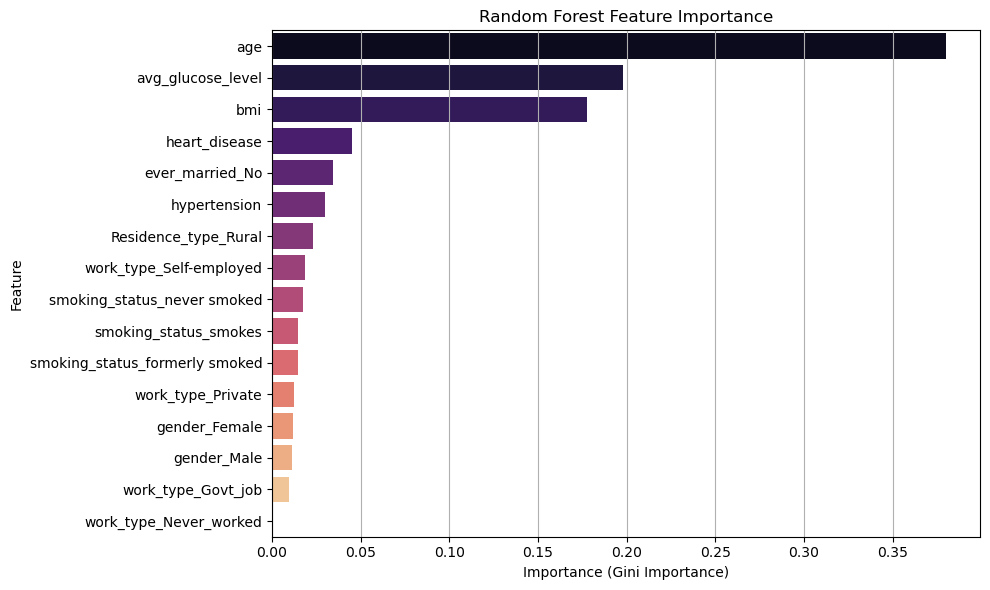

In [116]:
importances = trained_models['Random Forest'].feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(rf_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', hue='Feature', palette='magma')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance (Gini Importance)")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

- **Age** is by far the most important feature, contributing the most to the model's decisions.
- **Average glucose level** and **BMI** are also highly influential, reflecting key physiological indicators associated with stroke risk.
- **Heart disease** and **hypertension** show moderate importance, aligning with known medical risk factors.
- Features like **smoking status**, **work type**, and **gender** appear to have less predictive power according to this model.

### Performance Metric Results

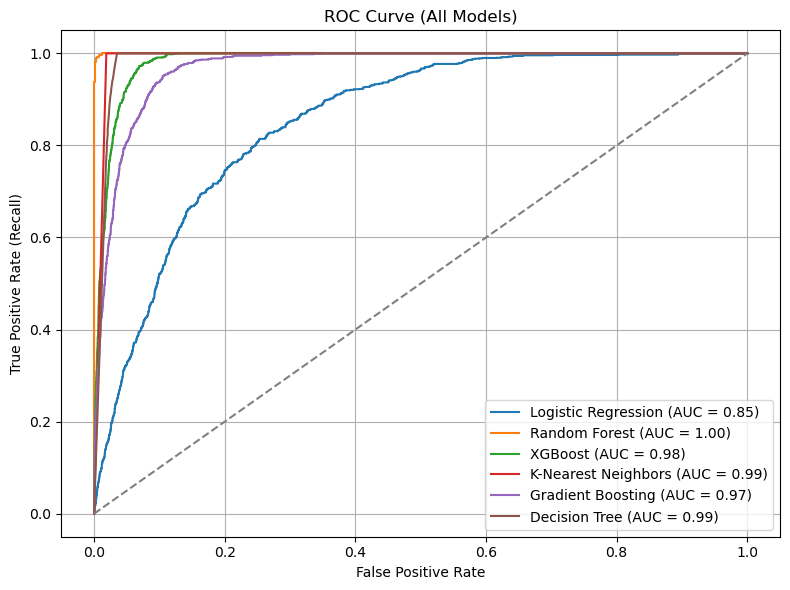

In [117]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve (All Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC (Receiver Operating Characteristic) curve above illustrates the performance of all trained models in terms of their ability to distinguish between stroke-positive and stroke-negative cases.
- **Random Forest** achieves perfect separation with an AUC of **1.00**, indicating flawless classification on the test set.
- **XGBoost**, **K-Nearest Neighbors**, and **Decision Tree** also perform exceptionally well, with AUC scores of **0.98–0.99**.
- **Gradient Boosting** follows closely with an AUC of **0.97**.
- **Logistic Regression**, has the lowest AUC (**0.85**)

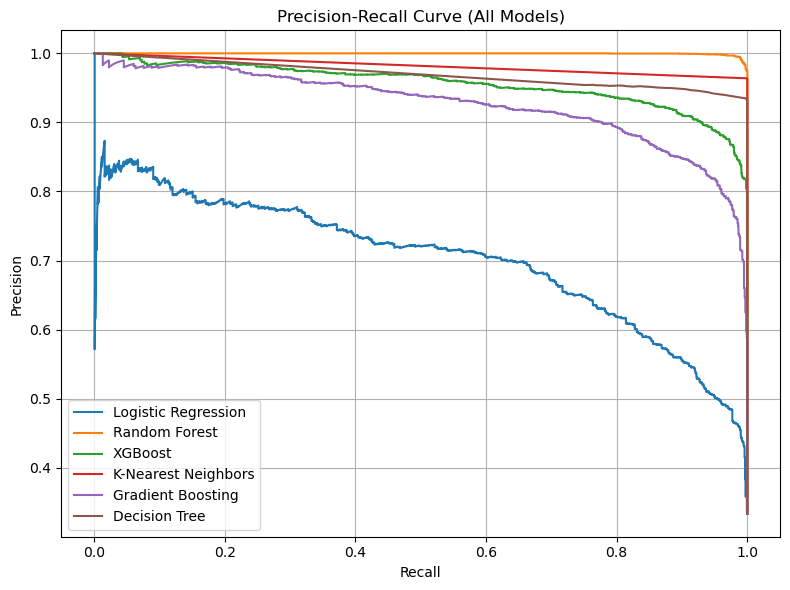

In [118]:
plt.figure(figsize=(8, 6))
for name, (recall, precision) in pr_data.items():
    plt.plot(recall, precision, label=name)
plt.title("Precision-Recall Curve (All Models)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Precision-Recall (PR) curve above evaluates how well each model balances precision and recall
- **Random Forest** and **Decision Tree** maintain nearly perfect precision across a wide recall range, indicating **extremely confident and consistent predictions**.
- **XGBoost**, **K-Nearest Neighbors**, and **Gradient Boosting** also achieve strong performance, maintaining high precision even as recall increases.
- **Logistic Regression** underperforms noticeably, with both lower precision and recall across most thresholds, a clear sign that it struggles to identify stroke cases as well as the other models.

In [119]:
metrics_df = pd.DataFrame(metrics_summary).T.reset_index().rename(columns={"index": "Model"})
metrics_df = metrics_df.sort_values(by="F1 Score", ascending=False)

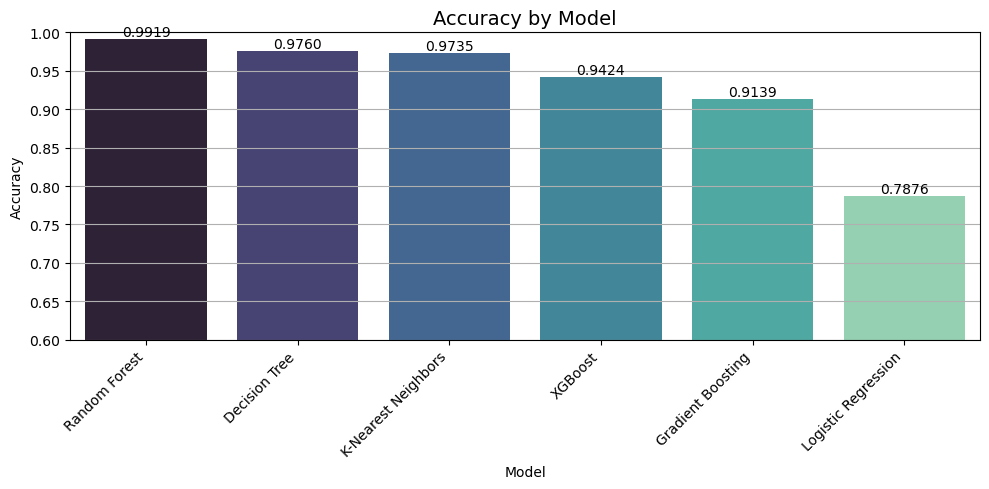

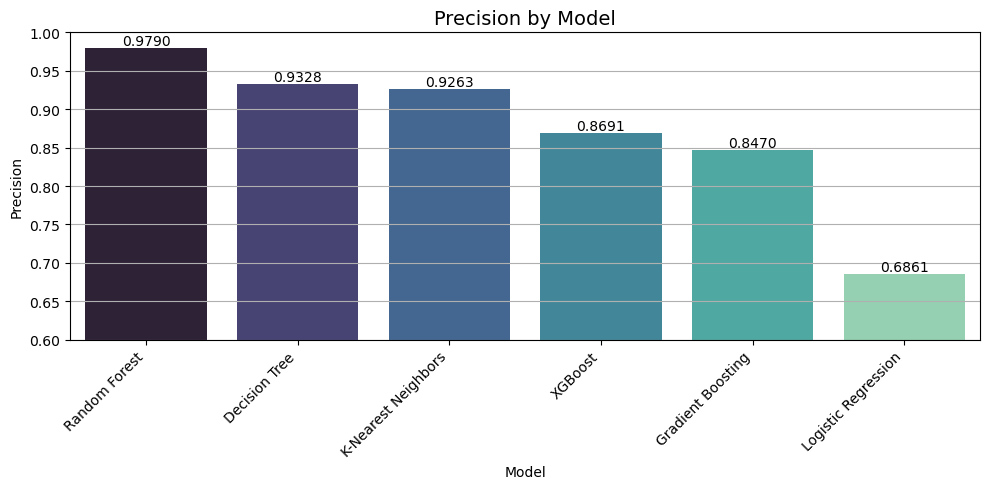

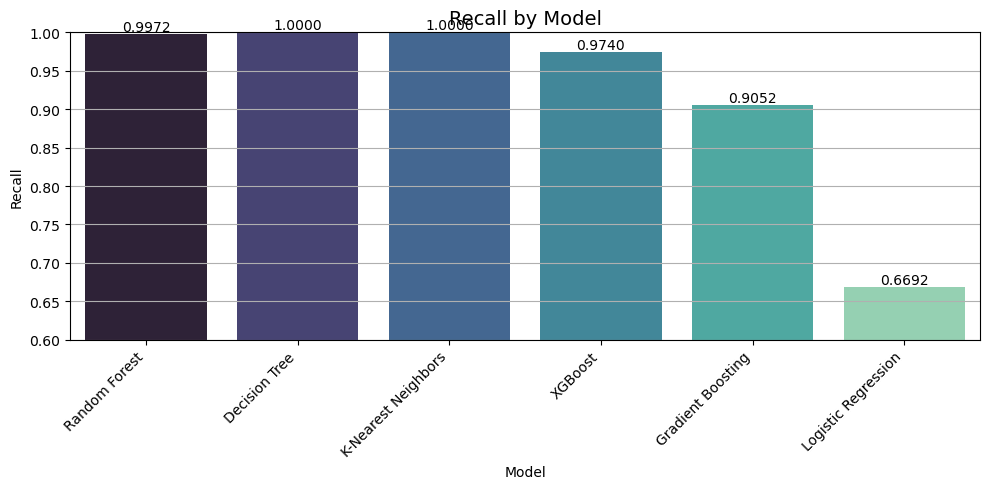

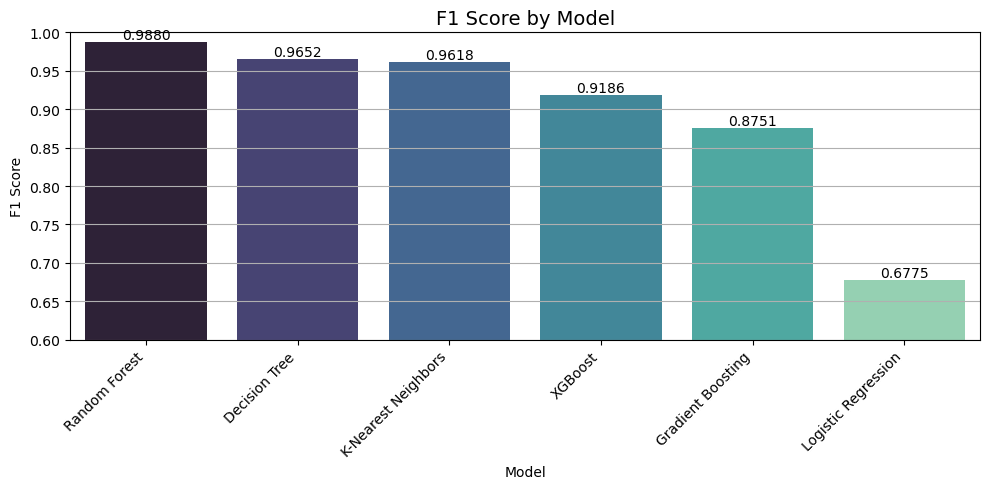

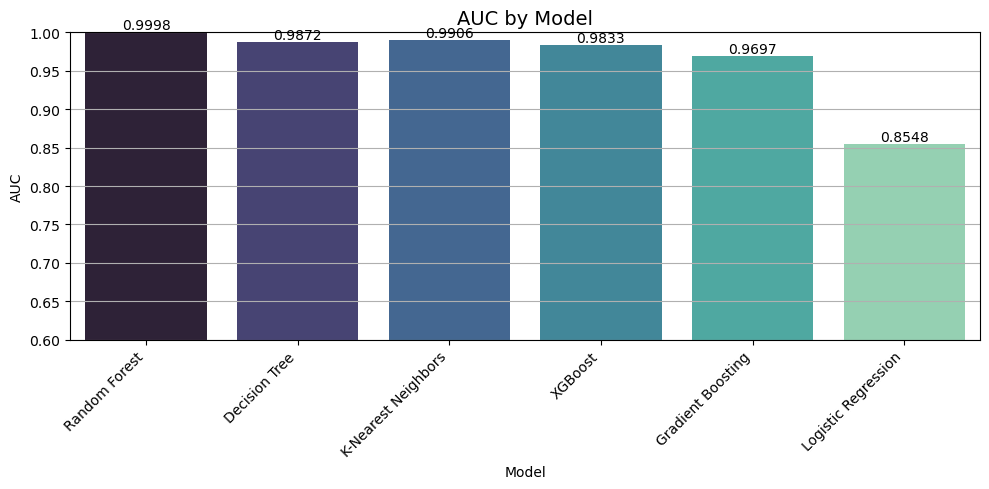

In [120]:
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Create a separate bar chart for each metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=metrics_df, x="Model", y=metric, palette="mako", hue='Model')
    plt.title(f"{metric} by Model", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0.6, 1.0)  
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height,
            s=f"{height:.4f}",
            ha='center',
            va='bottom',
            fontsize=10
        )
    plt.show()

- **Random Forest consistently outperforms** all other models across every metric, making it the **most robust and reliable** classifier in this study.
- Other models like **Logistic Regression** offer interpretability but compromise on performance, especially for recall and F1 score which are critical in this study.

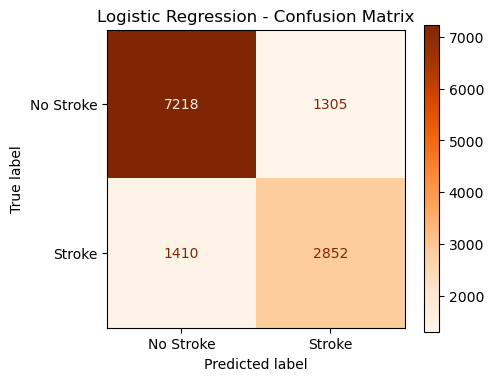

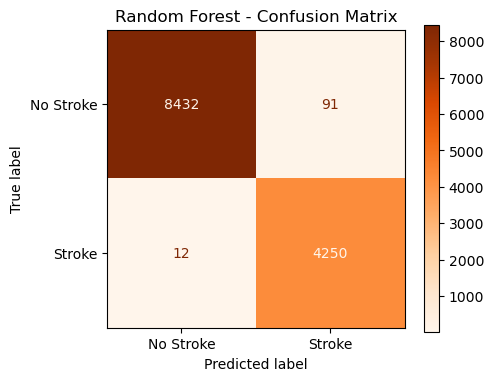

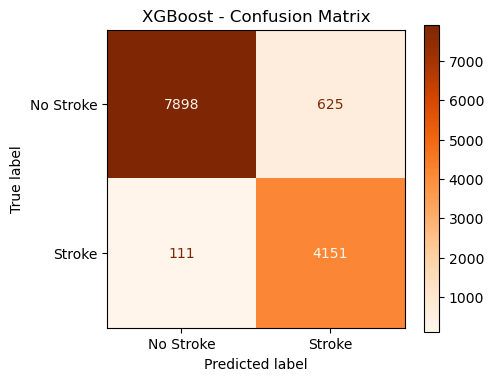

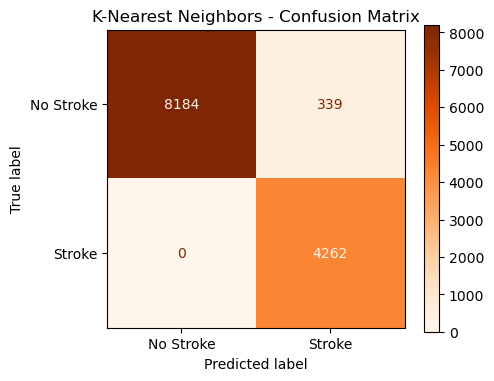

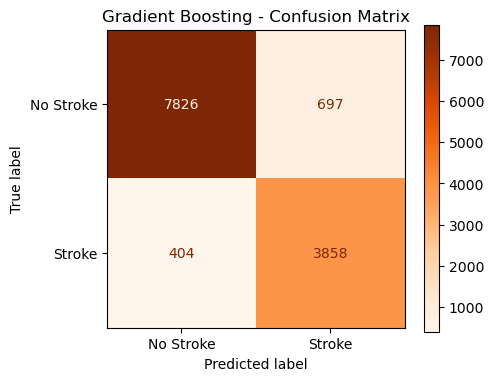

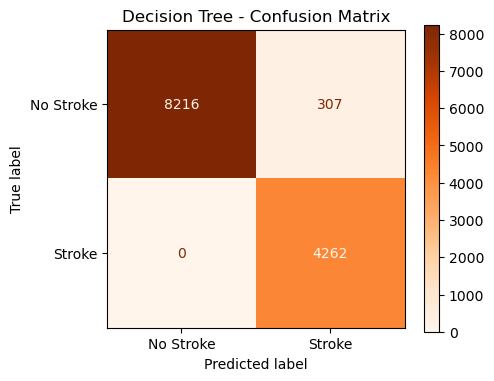

In [121]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

    fig, ax = plt.subplots(figsize=(5, 4))
    ax.grid(False)

    disp.plot(ax=ax, cmap='Oranges', values_format='d')
    ax.set_title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()


#### **Logistic Regression**
- **Observation**: Misses many stroke cases (poor recall)

#### **Random Forest** 
- **Observation**: Near perfect detection with minimal errors

#### **XGBoost** 
- **Observation**: High recall with some over-prediction

#### **K-Nearest Neighbors**
- **Observation**: Captures all stroke cases but with some overclassification

#### **Gradient Boosting**
- **Observation**: Decent trade-off, but more missed strokes compared to KNN or RF

#### **Decision Tree**
- **Observation**: Similar to KNN

Models like Random Forest, Decision Tree, and KNN** excel in medical-critical recall — minimizing false negatives.
In clinical applications, minimizing false negatives is vital. Based on these results, **Random Forest and Decision Tree** offer the best reliability for stroke identification.

### Neural Network

A different approach using PyTorch to detect important features for comparison with classical models

In [122]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class StrokeNN(nn.Module):
    def __init__(self, input_dim):
        super(StrokeNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [123]:
X_train = X_train.astype(float)
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [126]:
model = StrokeNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    epoch_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Avg Loss: {avg_loss:.4f}")



Epoch 1, Avg Loss: 0.4401
Epoch 2, Avg Loss: 0.4191
Epoch 3, Avg Loss: 0.4058
Epoch 4, Avg Loss: 0.3930
Epoch 5, Avg Loss: 0.3801
Epoch 6, Avg Loss: 0.3664
Epoch 7, Avg Loss: 0.3518
Epoch 8, Avg Loss: 0.3397
Epoch 9, Avg Loss: 0.3282
Epoch 10, Avg Loss: 0.3180
Epoch 11, Avg Loss: 0.3074
Epoch 12, Avg Loss: 0.2996
Epoch 13, Avg Loss: 0.2911
Epoch 14, Avg Loss: 0.2841
Epoch 15, Avg Loss: 0.2781
Epoch 16, Avg Loss: 0.2708
Epoch 17, Avg Loss: 0.2666
Epoch 18, Avg Loss: 0.2613
Epoch 19, Avg Loss: 0.2557
Epoch 20, Avg Loss: 0.2512
Epoch 21, Avg Loss: 0.2470
Epoch 22, Avg Loss: 0.2438
Epoch 23, Avg Loss: 0.2392
Epoch 24, Avg Loss: 0.2361
Epoch 25, Avg Loss: 0.2327
Epoch 26, Avg Loss: 0.2300
Epoch 27, Avg Loss: 0.2269
Epoch 28, Avg Loss: 0.2234
Epoch 29, Avg Loss: 0.2202
Epoch 30, Avg Loss: 0.2189
Epoch 31, Avg Loss: 0.2148
Epoch 32, Avg Loss: 0.2124
Epoch 33, Avg Loss: 0.2099
Epoch 34, Avg Loss: 0.2065
Epoch 35, Avg Loss: 0.2049
Epoch 36, Avg Loss: 0.2023
Epoch 37, Avg Loss: 0.2009
Epoch 38, 

Model Evaluation 

In [127]:
model.eval()

y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
X_test_tensor = torch.tensor(X_test.astype(np.float32).to_numpy(), dtype=torch.float32)

with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs >= 0.5).float().numpy()

y_pred_probs_np = y_pred_probs.numpy()

print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

print(f"AUC Score: {roc_auc_score(y_test_np, y_pred_probs_np):.4f}")


Confusion Matrix:
[[7946  577]
 [ 427 3835]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8523
           1       0.87      0.90      0.88      4262

    accuracy                           0.92     12785
   macro avg       0.91      0.92      0.91     12785
weighted avg       0.92      0.92      0.92     12785

AUC Score: 0.9698


- Performance is comparable to the top performing classical models, showing that this is a viable and competitive model for stroke prediction.

### Feature Importance Using SHAP

SHAP (Shapley Additive explanations) was chosen for feature importance analysis because it provides a mathematically principled way to interpret complex machine learning models such as the neural network model created. 

SHAP provides both global and local interpretability, making it ideal for understanding not only which features are most influential overall, but also how they contribute to individual predictions.

In [129]:
import shap

def predict_fn(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        return model(x_tensor).numpy()

stroke_pos_indices = y_test == 1
X_stroke_pos = X_test[stroke_pos_indices] 
X_stroke_pos_np = X_stroke_pos.astype(np.float32).to_numpy()

explainer = shap.Explainer(predict_fn, X_train.astype(np.float32).to_numpy(), feature_names=X_train.columns.tolist())

PermutationExplainer explainer: 4263it [01:00, 56.45it/s]                          


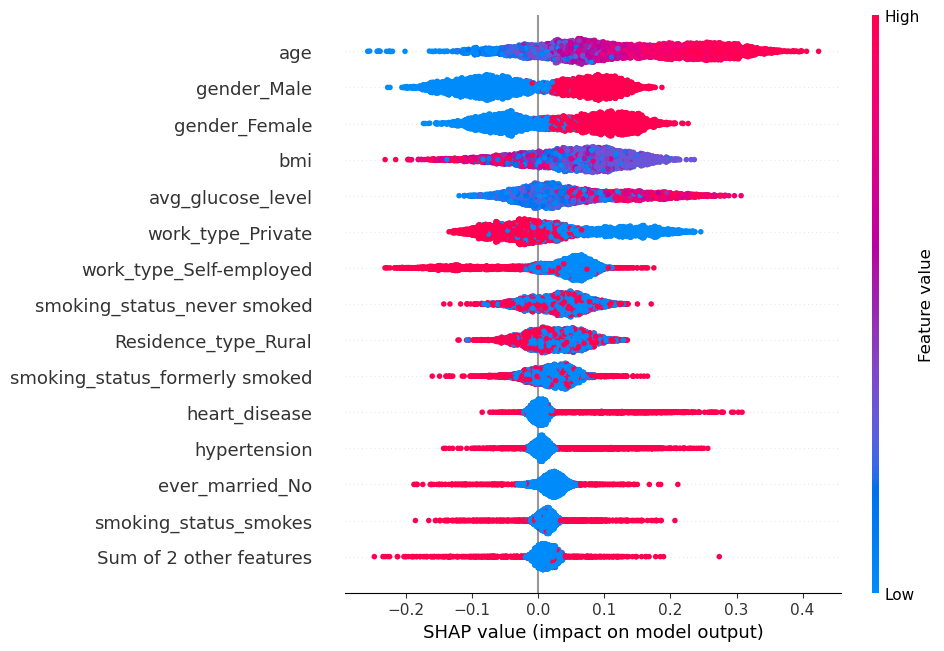

In [130]:
shap_values = explainer(X_stroke_pos_np)
shap.plots.beeswarm(shap_values, max_display=15)

- The horizontal spreadshows the impact of that feature (positive or negative SHAP value).
- Color indicates the actual feature value (blue = low, red = high).
- Higher **age**, **glucose**, and **BMI** strongly push predictions toward **stroke**.

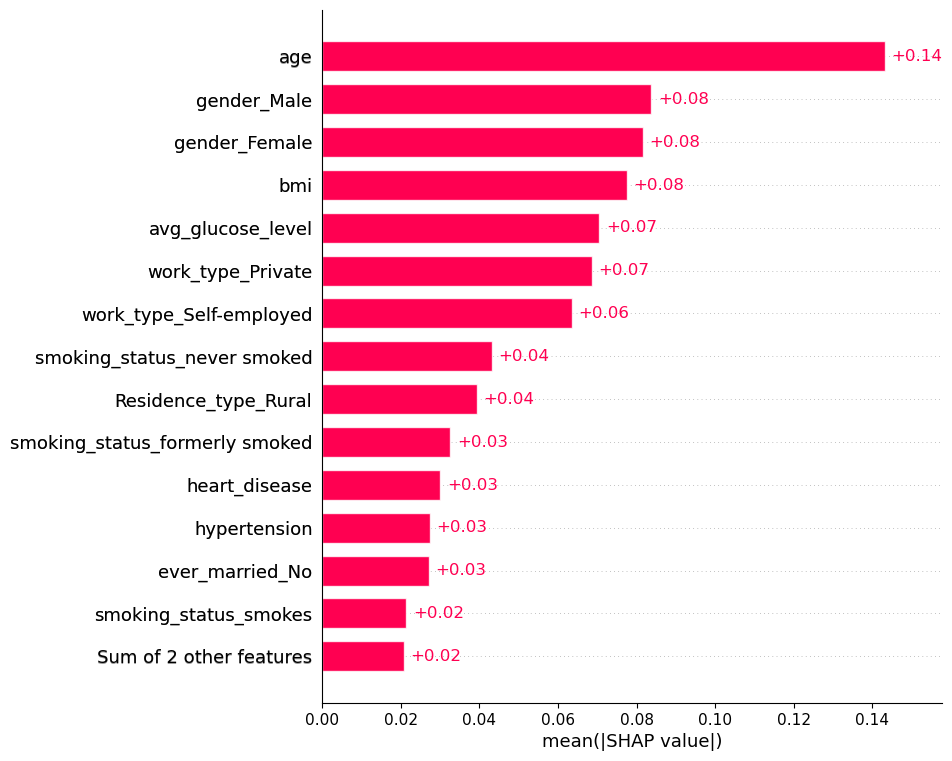

In [131]:
shap.plots.bar(shap_values, max_display=15)

- **Top contributors** include:
  - `age`
  - `avg_glucose_level`
  - `bmi`

In [132]:
import joblib

In [133]:
# Save the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")

# Also save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [1]:
import pandas as pd

# Model evaluation metrics
data = {
    "Model": [
        "Logistic Regression", "Random Forest", "XGBoost",
        "K-Nearest Neighbors", "Gradient Boosting", "Decision Tree"
    ],
    "Accuracy": [0.79, 0.99, 0.94, 0.97, 0.91, 0.98],
    "Precision": [0.69, 0.98, 0.87, 0.93, 0.85, 0.93],
    "Recall": [0.67, 1.00, 0.97, 1.00, 0.91, 1.00],
    "F1 Score": [0.68, 0.99, 0.92, 0.96, 0.88, 0.97],
    "AUC Score": [0.8548, 0.9998, 0.9833, 0.9906, 0.9697, 0.9872]
}

df = pd.DataFrame(data)
df.style.set_caption("Stroke Prediction Model Evaluation Metrics")

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.790000,0.690000,0.670000,0.680000,0.854800
1,Random Forest,0.990000,0.980000,1.000000,0.990000,0.999800
2,XGBoost,0.940000,0.870000,0.970000,0.920000,0.983300
3,K-Nearest Neighbors,0.970000,0.930000,1.000000,0.960000,0.990600
4,Gradient Boosting,0.910000,0.850000,0.910000,0.880000,0.969700
5,Decision Tree,0.980000,0.930000,1.000000,0.970000,0.987200
